In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load datasest
data= pd.read_csv(r'C:\Users\Abel\Downloads\CocaCola_Sales_Rawdata.csv',index_col=[0],parse_dates=[0],squeeze=True)

In [3]:
data

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

In [4]:
#statistical info
data.describe()

count      42.000000
mean     2994.353308
std       977.930896
min      1547.818996
25%      2159.714247
50%      2782.376999
75%      3609.250000
max      5253.000000
Name: Sales, dtype: float64

In [5]:
#null values
data.isnull().sum()

0

<AxesSubplot:xlabel='Quarter'>

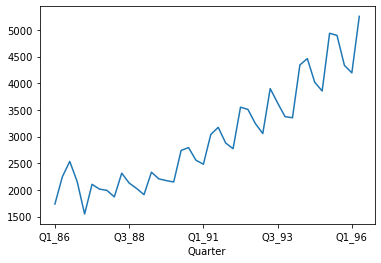

In [6]:
#plotting time series
data.plot()

## check the stationarity by adfuller test

In [7]:
from statsmodels.tsa.stattools import adfuller

#null hypothesis : non- stationary 
#alternate hypothesis: stationary
#alpha value : 0.05


result = adfuller(data)
print('p-value:%f' % result[1] )

p-value:0.996661


## As p-value is greater than 0.05 so we will accept the null value which means the time series is not stationary¶


## making the time series stationary by seasonal differencing

In [8]:
data_difference = data - data.shift(4)

<AxesSubplot:xlabel='Quarter'>

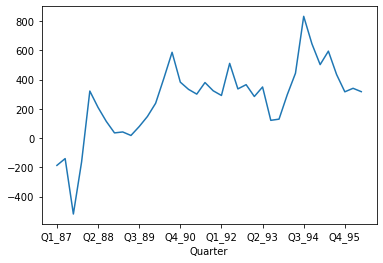

In [9]:
data_difference.dropna(inplace=True)
data_difference.plot()

In [10]:
#checking stationary
from statsmodels.tsa.stattools import adfuller

#null hypothesis : non- stationary 
#alternate hypothesis: stationary
#alpha value : 0.05


result = adfuller(data_difference)
print('p-value:%f' % result[1] )

p-value:0.090925


## Applying Transformation to make data  stationary

In [11]:
#transformation
data_transformed=np.log(data)
data_transformed.dropna(inplace=True)

<AxesSubplot:xlabel='Quarter'>

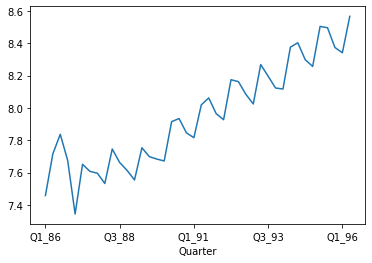

In [12]:
data_transformed.plot()

In [13]:
data_trans_diff = data_transformed - data_transformed.shift(4)

In [14]:
data_trans_diff.dropna(inplace=True)

<AxesSubplot:xlabel='Quarter'>

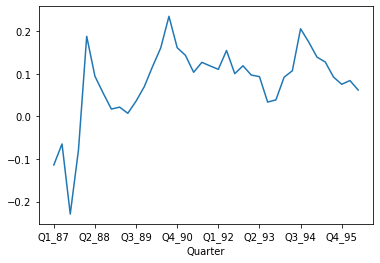

In [15]:
data_trans_diff.plot()

In [16]:
#cheking stationary
from statsmodels.tsa.stattools import adfuller

#null hypothesis : non- stationary 
#alternate hypothesis: stationary
#alpha value : 0.05


result = adfuller(data_trans_diff)
print('p-value:%f' % result[1] )

p-value:0.000007


## Now the time series is stationary as p-value is less than alpha

## Naive Model

In [17]:
#Now building the naive model



Naive_model = pd.concat([data,data.shift(1)],axis=1)
Naive_model.dropna(inplace=True)

Naive_model.columns=['Actual' , 'Forecasted']
Naive_model.head(10)

,Actual,Forecasted
Quarter,,
Q2_86,2244.960999,1734.827000
Q3_86,2533.804993,2244.960999
Q4_86,2154.962997,2533.804993
Q1_87,1547.818996,2154.962997
Q2_87,2104.411995,1547.818996
Q3_87,2014.362999,2104.411995
Q4_87,1991.746998,2014.362999
Q1_88,1869.049999,1991.746998
Q2_88,2313.631996,1869.049999


In [18]:
Rmse1 = np.sqrt(np.mean(Naive_model['Actual'] - Naive_model['Forecasted'])**2)
Rmse1

85.8090975609756

<AxesSubplot:xlabel='Quarter'>

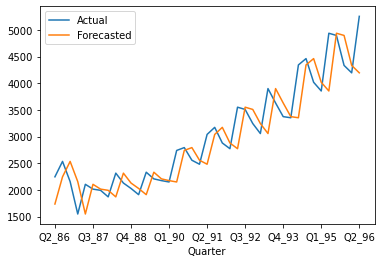

In [19]:
Naive_model['Actual'].plot(legend=True ,label='Actual') 
Naive_model['Forecasted'].plot(legend=True,label='Forecasted')


## ARIMA MODEL

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#To find p we use pacf
#To find q we use acf

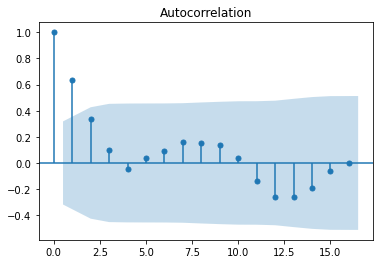

In [21]:
#To determine q
q=plot_acf(data_trans_diff)

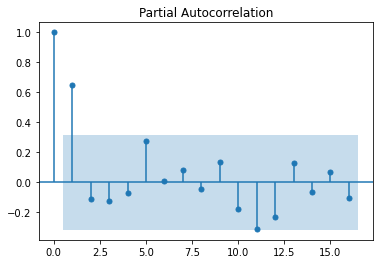

In [22]:
#To determine p
p=plot_pacf(data_trans_diff)

In [23]:
data_trans_diff.shape

(38,)

In [24]:
#Train-Test

Train = data_trans_diff[0:30]
Test = data_trans_diff[31:]


In [25]:
#building model
from statsmodels.tsa.arima_model import ARIMA
model2 = ARIMA(Train,order=(1,0,1))
arima_model=model2.fit()



D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [26]:
arima_forecast =arima_model.forecast(steps=7)[0]
arima_forecast

array([0.09201515, 0.07894639, 0.07187546, 0.06804969, 0.06597973,
       0.06485977, 0.06425381])

In [27]:
Rmse2=np.sqrt(np.mean(Test - arima_forecast)**2)
Rmse2

0.035982989205501185

## Using Linear Models

In [28]:
import statsmodels.formula.api as smf

In [29]:
#load the data
data1 = pd.read_csv('c:/users/Abel/Downloads\CocaCola_Sales_Rawdata.csv')
data1

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [30]:
#creating dummy variable for months column
Quarters=['Q1','Q2','Q3','Q4']




In [31]:
data1['Quarters']=0

In [32]:
for i in range(42):
    p=data1['Quarter'][i]
    data1['Quarters'][i]=p[0:2]

In [33]:
dummy= pd.DataFrame(pd.get_dummies(data1['Quarters']))
dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [34]:
add_data1=pd.concat((data1,dummy),axis=1)
add_data1

,Quarter,Sales,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [35]:
t= np.arange(1,43)
add_data1['t']=t  

In [36]:
add_data1['t_square']=add_data1['t']*add_data1['t']
log_Sales=np.log(add_data1['Sales'])
add_data1['log_Sales']=log_Sales

In [37]:
add_data1

,Quarter,Sales,Quarters,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [38]:
#Spliting the data set into train and test
train= add_data1[0:30]
test=add_data1[31:]


In [39]:
#Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1832.0923766847636

In [40]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

665.254780214001

In [41]:
#linear model
linear= smf.ols('Sales~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

571.3699680264273

# Using exponential model

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
#building holt's winter model
hwmodel=ExponentialSmoothing(train.Sales,trend='add',seasonal='add',seasonal_periods=4).fit()

In [48]:
hwmodel1=hwmodel.predict(start=test[['Sales']].index[0],end=test[['Sales']].index[-1])
Rmse3=np.sqrt(np.mean(test['Sales']-hwmodel1)**2)
Rmse3

172.98657052155875

In [52]:
#comparing rmse of model
Rmse_table={'Model':['Naive_model','arima_model','add_sea','addlinear','linear','hwmodel'],'Rmse':[Rmse1,Rmse2,rmse_add_sea,rmseaddlinear,rmselin,Rmse3]}
pd.DataFrame(Rmse_table)

,Model,Rmse
0,Naive_model,85.809098
1,arima_model,0.035983
2,add_sea,1832.092377
3,addlinear,665.254780
4,linear,571.369968
5,hwmodel,172.986571


## Arima Model has RMSE value very less so we can go for Arima Model for forecasting